In [1]:
import pandas as pd
import plotly.express as px
from pathlib import Path

In [3]:
# Base directory configuration
BASE_PC_DIR = Path(r'C:\Users\Work\Documents\GitHub\UNI\FDS02Q001\data_viz')
BASE_NB_DIR = Path(r'C:\Users\g.evola\repo\UNI\FDS02Q001\data_viz')

# Choose based on pc used
BASE_DIR = BASE_PC_DIR
DATA_DIR = BASE_DIR / 'datasets' / 'prison_statistics'

In [19]:
plot_data = pd.read_csv(DATA_DIR / 'mini_countries_trend_2022.csv')
print(f"Data loaded: {len(plot_data)} rows")

fig = px.line(
    plot_data,
    x='YEAR',
    y='OCC_ABS',
    color='geo',
    markers=True,
    #title="European countries exceed 100% prison occupancy rate",
    labels={'OCC_ABS': 'Occupancy Rate (%)', 'YEAR': 'Year'}
)

fig.update_layout(
    height=500,
    width=1000,
    font_size=14,
    title_font_size=16,
    legend=dict(
        orientation='h',          # Legenda orizzontale
        yanchor='bottom',         # Ancoraggio in basso
        y=-0.25,                  # Più in basso per spazio
        xanchor='center',         # Centrata
        x=0.5
    ),
    legend_title='Countries',
    xaxis=dict(showticklabels=True),   
    xaxis_title=""                        # <-- NASCONDE TITOLO ASSE X
)

print("✅ Chart object created")


Data loaded: 33 rows
✅ Chart object created


✅ HTML saved


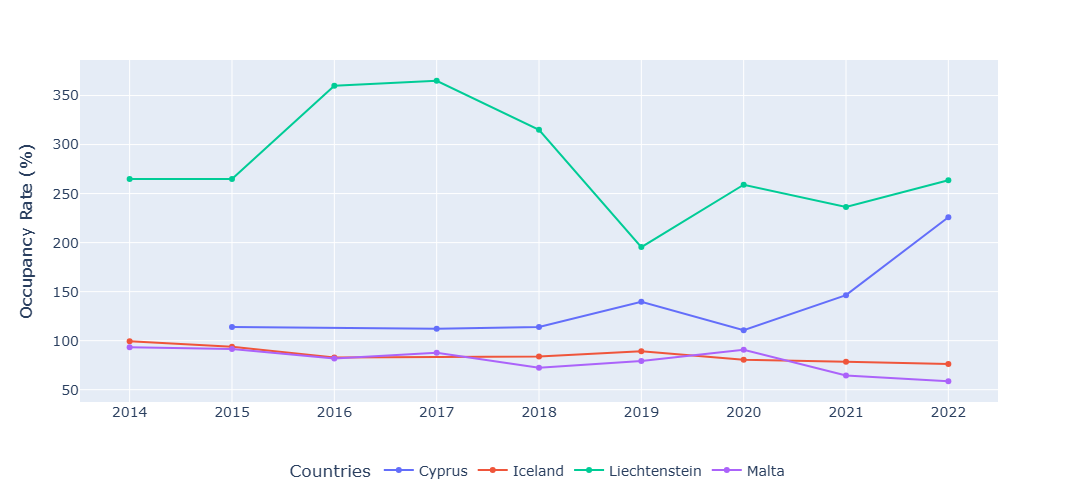

✅ Chart displayed (use browser screenshot for PDF)


In [20]:
# Only HTML export (stable)
fig.write_html(DATA_DIR / "mini_countries_trend_2022.html")
print("✅ HTML saved")

fig.show()
print("✅ Chart displayed (use browser screenshot for PDF)")


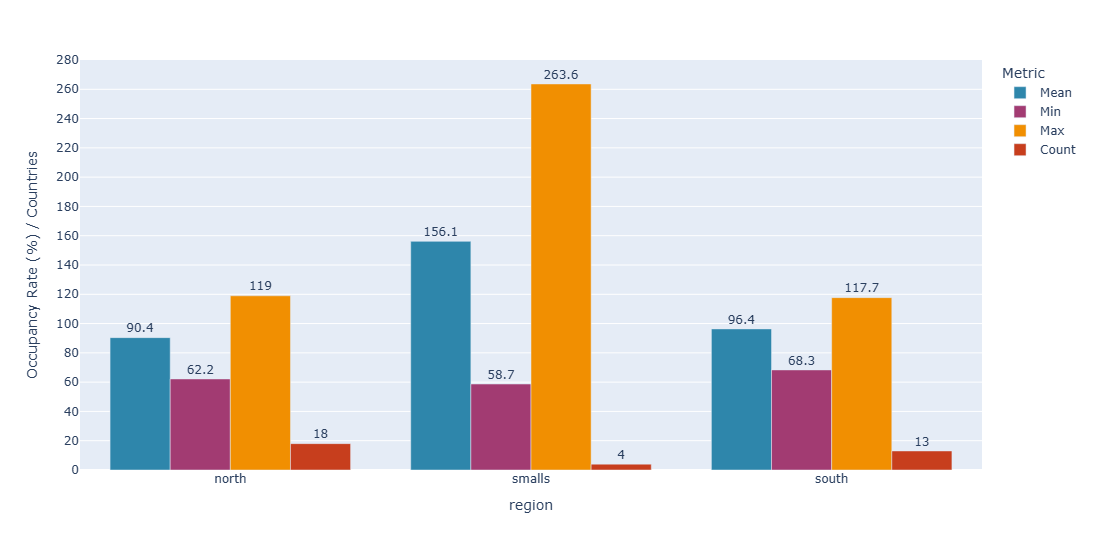

In [30]:
import pandas as pd
import plotly.express as px

# Carica e prepara dati
df = pd.read_csv(DATA_DIR /"compare_regions_2022.csv")
df_long = df.melt(id_vars=['region'], value_vars=['mean','min','max','count'], 
                  var_name='Metric', value_name='Value')
df_long['Metric'] = df_long['Metric'].str.title()
df_long['Value_Rounded'] = df_long['Value'].round(1)  # Arrotonda per labels

# Grafico con VALORI SOPRA LE BARRE
fig = px.bar(df_long, x='region', y='Value', color='Metric', barmode='group',
             color_discrete_map={
                 'Mean': '#2E86AB', 'Min': '#A23B72', 
                 'Max': '#F18F01', 'Count': '#C73E1D'
             },
             text='Value_Rounded',  # ← ETICHETTE SOPRA BARRE
             #title='**Prison Overcrowding: North vs South Europe (2022)**'
            )

fig.update_traces(
    textposition='outside',     # Testo FUORI dalla barra
    texttemplate='%{text}',     # Mostra il valore arrotondato
    textangle=0,                # Orizzontale
    textfont_size=12
)

# Asse Y pulito e preciso
fig.update_layout(
    yaxis=dict(
        title="Occupancy Rate (%) / Countries",
        tickmode='linear',
        dtick=20,                   # Step di 20 per pulizia
        range=[0, 280]
    ),
    yaxis2=dict(
        title="Countries", 
        overlaying='y', side='right', 
        tickvals=[15, 20], range=[0, 25]
    ),
    height=550, width=1000,
    showlegend=True
)

fig.show()
